In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_2217/2738078827.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('//Users/visheshpanghal/Downloads/Data_Science/python/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
print(X)

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=55)

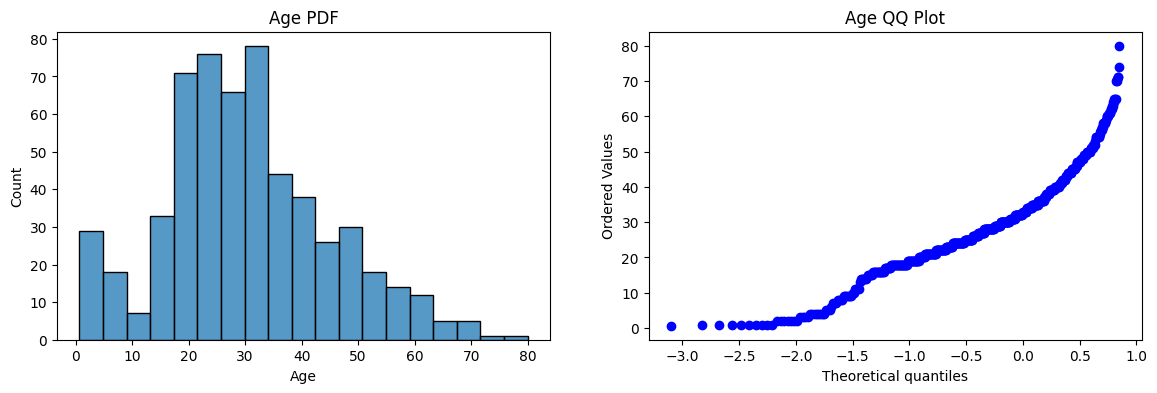

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')


plt.show()

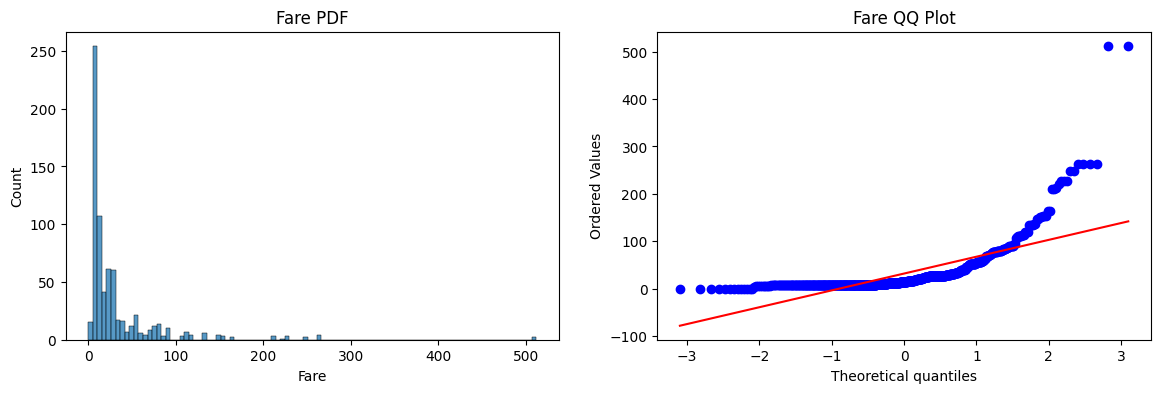

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)

stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_2217/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [15]:
X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)
X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_2217/2177546007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].mean(),inplace=True)
/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_2217/2177546007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

### Before Transformation Accuracy:-

In [23]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_predict = clf.predict(X_test)
y_predict1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_predict))
print("Accuracy DT",accuracy_score(y_test,y_predict1))

Accuracy LR 0.6201117318435754
Accuracy DT 0.6033519553072626


In [17]:
trf = FunctionTransformer(func=np.log1p)

In [18]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [21]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

In [24]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6089385474860335
Accuracy DT 0.6145251396648045


In [38]:
x_transformed = trf.fit_transform(X)
x_transformed['Age'].fillna(x_transformed['Age'].mean(),inplace=True)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.6791385767790261
DT 0.6644694132334582


/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_2217/2614376064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_transformed['Age'].fillna(x_transformed['Age'].mean(),inplace=True)


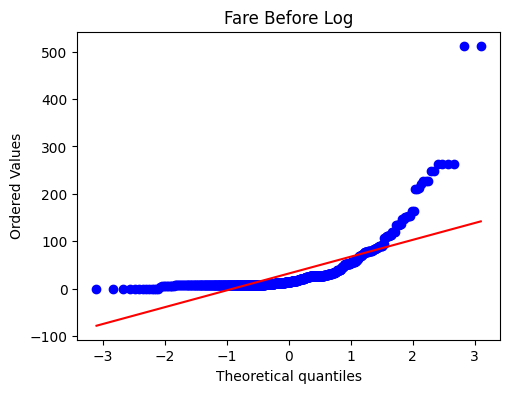

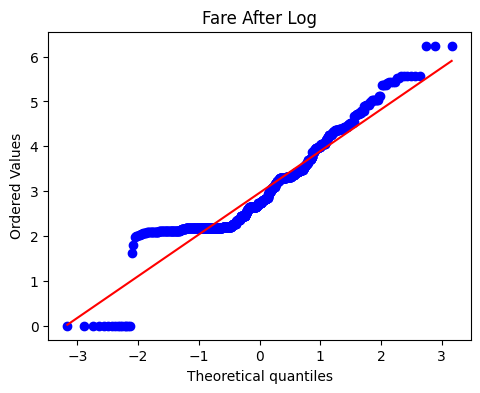

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare Before Log")

plt.figure(figsize=(12,4))
plt.subplot(122)
stats.probplot(x_transformed['Fare'],dist='norm',plot=plt)
plt.title("Fare After Log")

plt.show()

### After Transformation Accuracy:-